In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

import scipy.stats as stats

import acquire
import prepare

SyntaxError: invalid syntax. Perhaps you forgot a comma? (prepare.py, line 214)

Acquire, prepare & split your data.

In [2]:
# get the iris dataset 
df = acquire.get_iris_data()

this file exists, reading csv


In [3]:
# getting all the basic info
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [5]:
df.describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,75.500000,5.843333,3.057333,3.758000,1.199333
std,0.819232,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,38.250000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,75.500000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,112.750000,6.400000,3.300000,5.100000,1.800000
max,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 7)

In [7]:
# using this function will clean the data like drop colums
df = prepare.prep_iris(df)

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# splitting the data set
train,validate,test = prepare.splitting_data(df, 'species')

In [30]:
train.shape

(90, 5)

In [34]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa


In [32]:
validate.shape

(30, 5)

In [35]:
validate.head()

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,virginica
125,7.2,3.2,6.0,1.8,virginica
100,6.3,3.3,6.0,2.5,virginica
43,5.0,3.5,1.6,0.6,setosa
91,6.1,3.0,4.6,1.4,versicolor


In [33]:
test.shape

(30, 5)

In [36]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
86,6.7,3.1,4.7,1.5,versicolor
34,4.9,3.1,1.5,0.2,setosa
76,6.8,2.8,4.8,1.4,versicolor


In [39]:
cat_col = []
con_col = []

# making a for loop to find what is continuous or categorical
for col in df.columns:
    
    print (col)
    print (df[col].dtype)
    if (df[col].dtype) == 'object':
        cat_col.append(col)
    else:
        print ('number variable') 
        print(df[col].nunique())
        if df[col].nunique() < 10:
            cat_col.append(col)
        else:
            con_col.append(col)
    print()

sepal_length
float64
number variable
35

sepal_width
float64
number variable
23

petal_length
float64
number variable
43

petal_width
float64
number variable
22

species
object



In [40]:
df.species.nunique()

3

In [41]:
# show the categorical in this dataset
cat_col

['species']

In [42]:
con_col

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

species
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


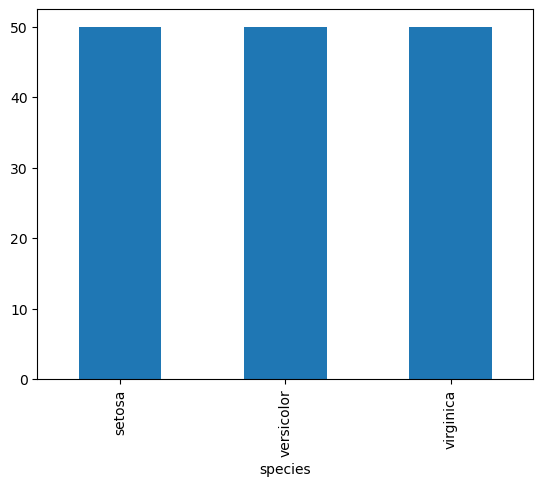

In [14]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))
    print(df[col].value_counts().plot.bar())
    plt.show()
    print()


sepal_length
sepal_length
(4.295, 4.66]     9
(4.66, 5.02]     23
(5.02, 5.38]     14
(5.38, 5.74]     27
(5.74, 6.1]      22
(6.1, 6.46]      20
(6.46, 6.82]     18
(6.82, 7.18]      6
(7.18, 7.54]      5
(7.54, 7.9]       6
Name: count, dtype: int64


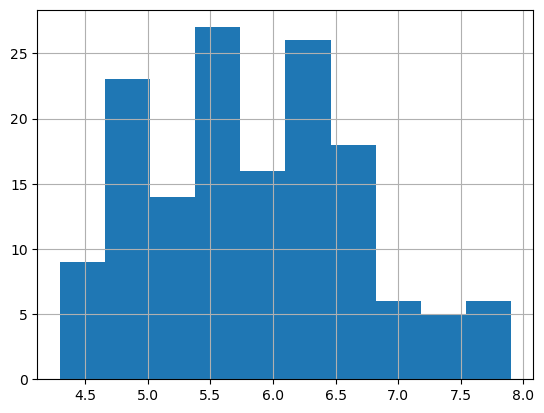

sepal_width
sepal_width
(1.997, 2.24]     4
(2.24, 2.48]      7
(2.48, 2.72]     22
(2.72, 2.96]     24
(2.96, 3.2]      50
(3.2, 3.44]      18
(3.44, 3.68]     10
(3.68, 3.92]     11
(3.92, 4.16]      2
(4.16, 4.4]       2
Name: count, dtype: int64


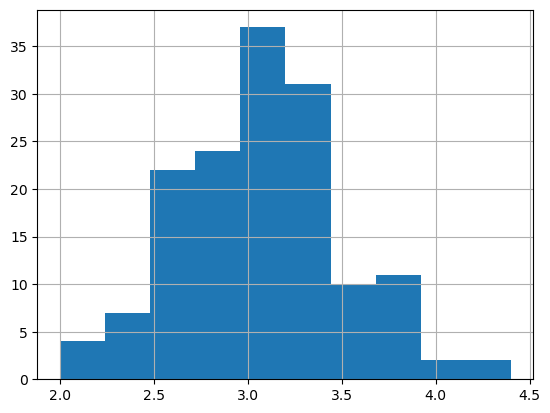

petal_length
petal_length
(0.993, 1.59]    37
(1.59, 2.18]     13
(2.18, 2.77]      0
(2.77, 3.36]      3
(3.36, 3.95]      8
(3.95, 4.54]     26
(4.54, 5.13]     29
(5.13, 5.72]     18
(5.72, 6.31]     11
(6.31, 6.9]       5
Name: count, dtype: int64


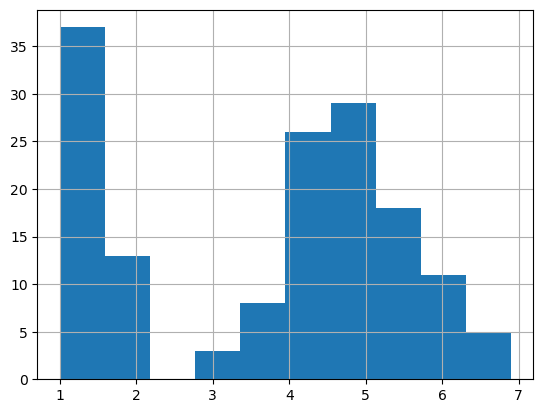

petal_width
petal_width
(0.0966, 0.34]    41
(0.34, 0.58]       8
(0.58, 0.82]       1
(0.82, 1.06]       7
(1.06, 1.3]       21
(1.3, 1.54]       20
(1.54, 1.78]       6
(1.78, 2.02]      23
(2.02, 2.26]       9
(2.26, 2.5]       14
Name: count, dtype: int64


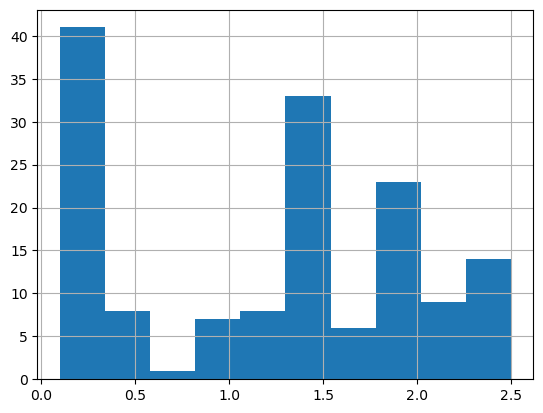

In [15]:
for col in con_col:
    print(col)
    print(df[col].value_counts(bins=10).sort_index())
    df[col].hist()
    plt.show()

In [16]:
train.shape

(90, 5)

(30, 5)

In [18]:
test.shape

(30, 5)

In [19]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa



For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.



Question- does the plant petal lengh depend on the plant 

$h_a$ this is no relaptionship between plant and plleaves 


$h_o$ there is a relaptionship between plant lefts

In [20]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,90.000000,90.000000,90.000000,90.000000
mean,5.781111,3.023333,3.728889,1.191111
std,0.792081,0.434741,1.710526,0.757679
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.725000,1.600000,0.325000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.300000,3.375000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.


Document takeaways & any actions.



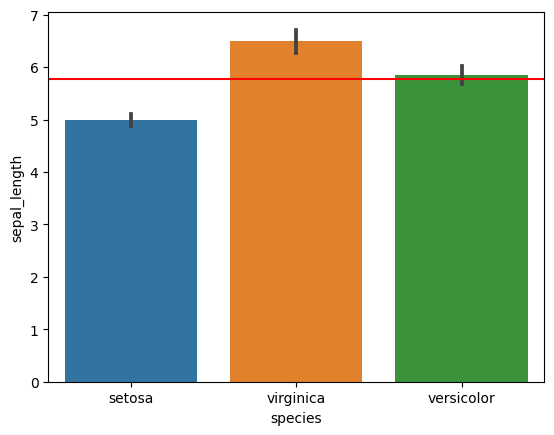

In [21]:
# use more for loop 

sns.barplot(data=train,  x = 'species', y = 'sepal_length')
mean1 = train.sepal_length.mean()

plt.axhline(y=mean1, color='red')


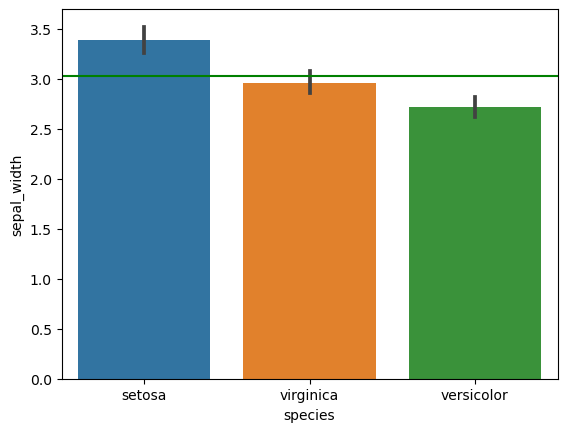

In [22]:
sns.barplot(data=train, x= 'species', y = 'sepal_width')

mean2 = train.sepal_width.mean()

plt.axhline(y=mean2, color='green')


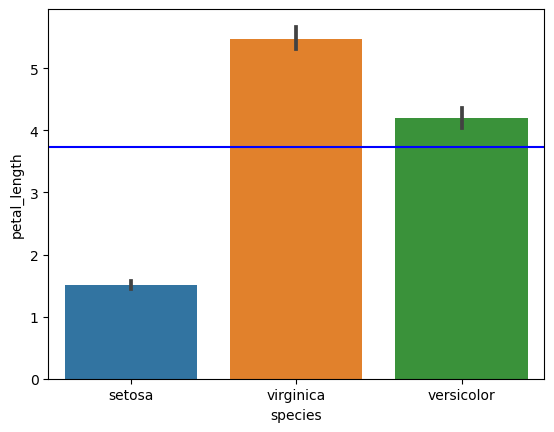

In [23]:
sns.barplot(data=train, x= 'species',y = 'petal_length')

mean3 = train.petal_length.mean()

plt.axhline(y=mean3, color='blue')


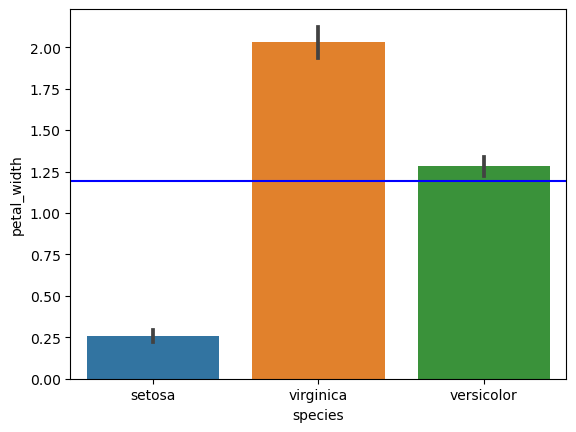

In [24]:
sns.barplot(data=train, x= 'species',y = 'petal_width')

mean4 = train.petal_width.mean()

plt.axhline(y=mean4, color='blue')

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [25]:
p = .05

In [ ]:
vig = train[train.species == 'Viginica']
verslcolor = train[train.species == 'Viginica']

Multivariate Stats


Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


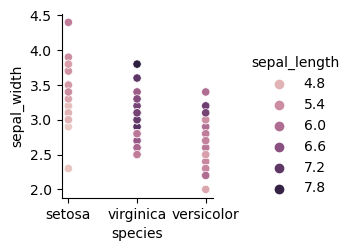

In [26]:
sns.pairplot(data=train, x_vars='species',y_vars='sepal_width',hue='sepal_length')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


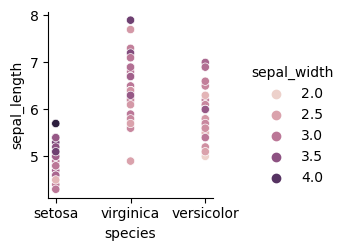

In [27]:
sns.pairplot(data=train, x_vars='species',y_vars='sepal_length',hue='sepal_width')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


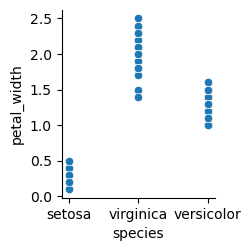

In [28]:
sns.pairplot(data=train, x_vars='species',y_vars='petal_width')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


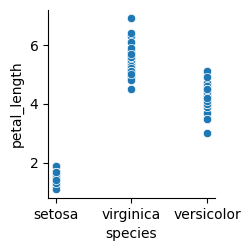

In [29]:
sns.pairplot(data=train, x_vars='species',y_vars='petal_length')

Explore your telco data to discover drivers of churn

Determine if certain columns should be dropped

Determine if it would be valuable to bin some numeric columns

Determine if it would be valuable to combine multiple columns into 
one.


In [ ]:
true pos 6
true neg 2,4,7

false pos 1
false neg 3 5 

In [2]:
teclo = acquire.get_telco_data()

In [5]:
prepare.

0    No
Name: churn, dtype: object